In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
first_image = x_train[0]

In [7]:
first_image.shape

(28, 28)

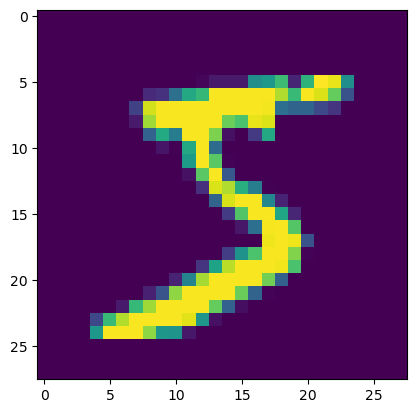

In [8]:
plt.imshow(first_image)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train,num_classes=10)

In [16]:
first_image.max()

255

In [17]:
first_image.min()

0

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
scaled_image = x_train[0]


In [21]:
scaled_image.max()

1.0

In [22]:
x_test.shape

(10000, 28, 28)

In [23]:
x_train = x_train.reshape(60000,28,28,1)

In [24]:
x_test = x_test.reshape(10000,28,28,1)

In [25]:
from tensorflow.keras.models import Sequential

In [26]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [27]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [29]:
from tensorflow.keras.callbacks import EarlyStopping


In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [31]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1410 - accuracy: 0.9574 - val_loss: 0.0578 - val_accuracy: 0.9824
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0483 - accuracy: 0.9851 - val_loss: 0.0492 - val_accuracy: 0.9844
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0326 - accuracy: 0.9897 - val_loss: 0.0414 - val_accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0409 - val_accuracy: 0.9871
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0167 - accuracy: 0.9946 - val_loss: 0.0450 - val_accuracy: 0.9862


In [33]:
metrics = pd.DataFrame(model.history.history)

In [34]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.140955,0.957433,0.057752,0.9824
1,0.048346,0.985100,0.049158,0.9844
2,0.032648,0.989683,0.041378,0.9856
3,0.020359,0.993600,0.040860,0.9871
4,0.016747,0.994600,0.045041,0.9862


<Axes: >

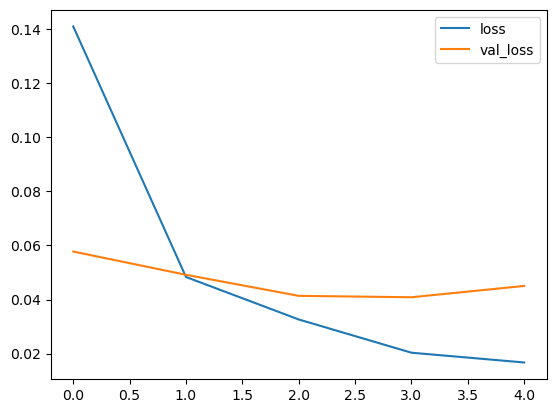

In [36]:
metrics[['loss','val_loss']].plot()

<Axes: >

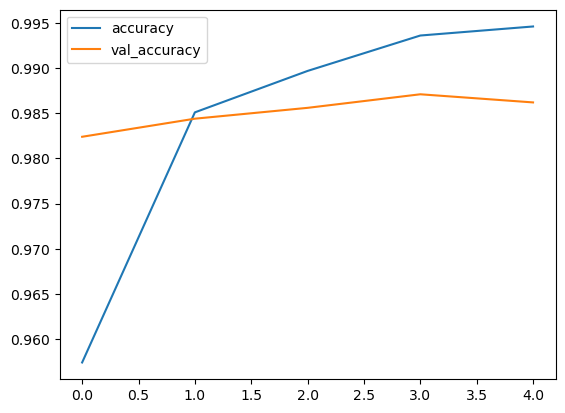

In [37]:
metrics[['accuracy','val_accuracy']].plot()

In [38]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.04504125192761421, 0.9861999750137329]

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 13s 42ms/step


In [44]:
y_cat_test.shape

(10000, 10)

In [45]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.96      1.00      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [47]:
confusion_matrix(y_test,predictions)

array([[ 973,    0,    0,    0,    1,    0,    3,    1,    1,    1],
       [   1, 1125,    1,    0,    4,    0,    1,    0,    3,    0],
       [   3,    2, 1016,    0,    2,    0,    0,    5,    4,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    1,    0,    0],
       [   0,    0,    0,    0,  979,    0,    2,    0,    0,    1],
       [   0,    0,    0,   11,    0,  876,    3,    0,    1,    1],
       [   3,    2,    0,    0,    5,    1,  945,    0,    2,    0],
       [   0,    2,    4,    2,    8,    0,    0, 1006,    1,    5],
       [   2,    0,    2,    1,    5,    0,    0,    2,  959,    3],
       [   1,    2,    0,    1,   21,    3,    0,    4,    0,  977]],
      dtype=int64)

In [48]:
import seaborn as sns

<Axes: >

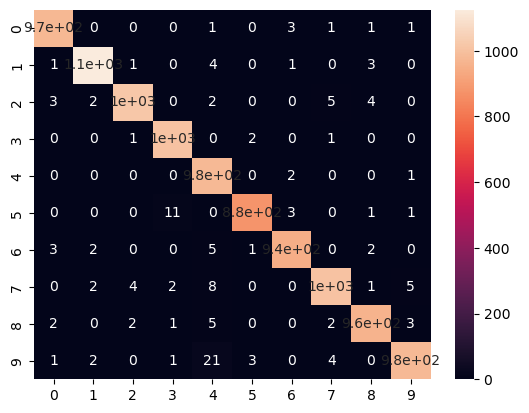

In [52]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [53]:
my_number = x_test[0]

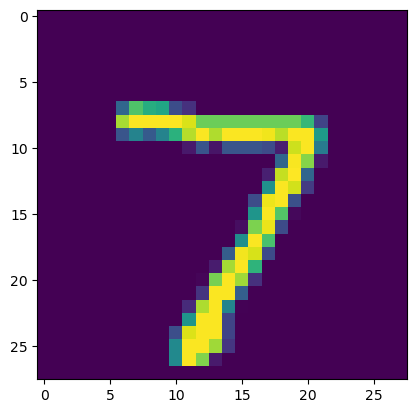

In [54]:
plt.imshow(my_number.reshape(28,28))

In [59]:
np.argmax(model.predict(my_number.reshape(1,28,28,1)), axis=-1)

1/1 [==============================] - 0s 22ms/step


array([7], dtype=int64)